In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import PIL
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
flower_Dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

# cache directory is a directory where we want to save to dataset for this we have to supply . here if we want different directory c\data\my 

# untar=True mean this is a zip file unzip it 

In [4]:
flower_Dir

'.\\datasets\\flower_photos'

# now we are going to convert this data directory into path lib 

# pathlib is a native python library for handling files and paths on your operating system 
# it provide an easier method to interact with the filesystem no matter what the operating system is 

In [5]:
import pathlib

# we are going to over the flower image one one by one and read them into numpy array for this pathlib will be useful 

In [6]:
flower_Dir=pathlib.Path(flower_Dir)
flower_Dir

WindowsPath('datasets/flower_photos')

In [7]:
list(flower_Dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

# the glob module which is short for global is a function that is used to search for files that match a specific file pattern or name 

In [8]:
len(list((flower_Dir.glob('*/*.jpg'))))

3670

In [9]:
roses=list(flower_Dir.glob('roses/*'))

In [10]:
tulips=list(flower_Dir.glob('tulips/*'))

In [11]:
dandelion=list(flower_Dir.glob('dandelion/*'))

In [12]:
daisy=list(flower_Dir.glob('daisy/*'))

In [13]:
sunflowers=list(flower_Dir.glob('sunflowers/*'))

In [14]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [15]:
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

In [16]:
daisy[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [17]:
dandelion[:5]

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg')]

In [18]:
sunflowers[:5]

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg')]

In [19]:
len(roses)

641

In [20]:
len(tulips)

799

In [21]:
len(roses)

641

In [22]:
len(sunflowers)

699

In [23]:
len(dandelion)

898

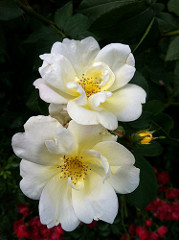

In [24]:
PIL.Image.open(str(roses[0]))

# creating a distionary whihch containg all the flower 

In [25]:
flower_Dict={
    'daisy' : daisy,
    'dandelion' : dandelion,
    'roses' : roses,
    'sunflowers' : sunflowers,
    'tulips' : tulips   
}

In [26]:
flower_Dict

{'daisy': [WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
  WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
  WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
  WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
  WindowsPath('dataset

In [27]:
flower_Dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

# we also need a label dictionary for it 

In [28]:
flower_Dict_label={
    'daisy' : 0,
    'dandelion' : 1,
    'roses' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

# we can use cv2 module to read this image file into opencv object 

# so here we supply file path in written we got the numpy array

# opencv does not take the window path we have to allpy in the str

In [29]:
img=cv2.imread(str(flower_Dict['roses'][0]))

In [30]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [31]:
img.shape

(240, 179, 3)

In [32]:
cv2.resize(img,(100,100)).shape

(100, 100, 3)

In [33]:
x,y=[],[]

In [34]:
for flower_name, Images in flower_Dict.items():
    for image in Images:
        img=cv2.imread(str(image))
        resize_img=cv2.resize(img,(100,100))
        x.append(resize_img)
        y.append(flower_Dict_label[flower_name])

#items() method is used to return the list with all dictionary keys with values

# why we are resizing the image because machine learning model expect all the training sample to be same direction 

In [35]:
x[:5]

[array([[[136, 137, 137],
         [146, 146, 146],
         [150, 149, 149],
         ...,
         [153, 155, 155],
         [152, 154, 154],
         [156, 156, 156]],
 
        [[134, 136, 136],
         [144, 145, 145],
         [149, 147, 148],
         ...,
         [153, 155, 155],
         [152, 154, 154],
         [152, 152, 152]],
 
        [[127, 131, 132],
         [136, 138, 139],
         [144, 146, 146],
         ...,
         [153, 155, 155],
         [151, 153, 153],
         [149, 149, 149]],
 
        ...,
 
        [[ 25,  46,  43],
         [ 24,  45,  42],
         [ 25,  47,  44],
         ...,
         [124, 125, 129],
         [120, 121, 125],
         [124, 125, 129]],
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 27,  48,  46],
         ...,
         [127, 127, 132],
         [125, 126, 130],
         [125, 126, 130]],
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 29,  48,  46],
         ...,
         [129, 130, 134],
  

In [36]:
y[625:720]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [37]:
x=np.array(x)
y=np.array(y)

In [38]:
len(x)

3670

In [39]:
len(y)

3670

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=30)

In [42]:
len(x_train)

3119

In [43]:
len(x_test)

551

In [44]:
len(y_train)

3119

In [45]:
len(y_test)

551

In [46]:
x_train[0]

array([[[183, 170, 131],
        [193, 182, 133],
        [204, 169, 139],
        ...,
        [ 14,   6,  14],
        [200, 172, 169],
        [  7,   6,  11]],

       [[173, 170, 133],
        [234, 195, 166],
        [141, 149, 105],
        ...,
        [  6,  33,  21],
        [ 98, 103,  90],
        [ 20,  15,  17]],

       [[ 15,  18,  12],
        [197, 138, 119],
        [ 32,  67,  51],
        ...,
        [ 23,  26,  24],
        [ 65,  40,  42],
        [243, 212, 178]],

       ...,

       [[  9,  76,  60],
        [ 62, 156, 131],
        [  5,  12,   3],
        ...,
        [ 37, 120, 104],
        [ 19,  56,  76],
        [ 28,  70,  71]],

       [[ 29,  83,  83],
        [ 62, 147, 117],
        [  7,   3,   1],
        ...,
        [ 42, 153, 126],
        [ 62, 135, 113],
        [ 22, 112,  88]],

       [[  7,  32,  15],
        [ 48, 133, 106],
        [ 89, 157, 135],
        ...,
        [  7,  12,   7],
        [  7,   9,   8],
        [  7,   8,   8]]

In [47]:
x_train=x_train/255

In [48]:
x_test=x_test/255

In [49]:
x_train[0]

array([[[0.71764706, 0.66666667, 0.51372549],
        [0.75686275, 0.71372549, 0.52156863],
        [0.8       , 0.6627451 , 0.54509804],
        ...,
        [0.05490196, 0.02352941, 0.05490196],
        [0.78431373, 0.6745098 , 0.6627451 ],
        [0.02745098, 0.02352941, 0.04313725]],

       [[0.67843137, 0.66666667, 0.52156863],
        [0.91764706, 0.76470588, 0.65098039],
        [0.55294118, 0.58431373, 0.41176471],
        ...,
        [0.02352941, 0.12941176, 0.08235294],
        [0.38431373, 0.40392157, 0.35294118],
        [0.07843137, 0.05882353, 0.06666667]],

       [[0.05882353, 0.07058824, 0.04705882],
        [0.77254902, 0.54117647, 0.46666667],
        [0.1254902 , 0.2627451 , 0.2       ],
        ...,
        [0.09019608, 0.10196078, 0.09411765],
        [0.25490196, 0.15686275, 0.16470588],
        [0.95294118, 0.83137255, 0.69803922]],

       ...,

       [[0.03529412, 0.29803922, 0.23529412],
        [0.24313725, 0.61176471, 0.51372549],
        [0.01960784, 0

# making the array in the scalable form 

In [50]:
num_classes = 5

model = Sequential([
  layers.Conv2D(160, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(132, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten()  ,
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
98/98 [==============================] - 262s 2s/step - loss: 1.3623 - accuracy: 0.3960
Epoch 2/20
98/98 [==============================] - 220s 2s/step - loss: 1.0681 - accuracy: 0.5736
Epoch 3/20
98/98 [==============================] - 223s 2s/step - loss: 0.9368 - accuracy: 0.6307
Epoch 4/20
98/98 [==============================] - 652s 7s/step - loss: 0.8115 - accuracy: 0.6858
Epoch 5/20
98/98 [==============================] - 528s 5s/step - loss: 0.6543 - accuracy: 0.7448
Epoch 6/20
98/98 [==============================] - 323s 3s/step - loss: 0.5038 - accuracy: 0.8067
Epoch 7/20
98/98 [==============================] - 331s 3s/step - loss: 0.3706 - accuracy: 0.8657
Epoch 8/20
98/98 [==============================] - 332s 3s/step - loss: 0.2370 - accuracy: 0.9211
Epoch 9/20
98/98 [==============================] - 374s 4s/step - loss: 0.1549 - accuracy: 0.9477
Epoch 10/20
98/98 [==============================] - 275s 3s/step - loss: 0.1231 - accuracy: 0.9583
Epoch 11/

# in last dense layer we do not give the activation so by default it used linear 

In [51]:
model.evaluate(x_test,y_test)

18/18 [==============================] - 88s 2s/step - loss: 2.7282 - accuracy: 0.6479


[2.7281997203826904, 0.647912859916687]

In [58]:
model.save('augmentation.h5')

c:\MinGW\python32\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
from tensorflow.keras.models import load_model
model1=load_model('augmentation.h5')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 160)     4480      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 160)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 132)       190212    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 132)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        76096     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 160)     4480      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 160)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 132)       190212    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 132)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        76096     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0

In [61]:
model1.evaluate(x_test,y_test)

18/18 [==============================] - 17s 736ms/step - loss: 2.7282 - accuracy: 0.6479


[2.7281997203826904, 0.647912859916687]

# in training data set if it is given the accuracy of 99 percent something like that but in train data set it is giving the accuracy upto 65 percent or like that then it is example of overfitting that is ouer model is overfitted 

In [62]:
predictions=model.predict(x_test)

18/18 [==============================] - 16s 853ms/step


In [63]:
predictions

array([[-0.63812226, -3.0885775 , -2.8607962 , -0.02002093, 12.686472  ],
       [ 4.0980487 , 15.411829  , -5.760241  , -5.178006  , -4.0230136 ],
       [-0.43319473,  6.3505254 ,  3.3597147 , -8.142496  ,  1.5570103 ],
       ...,
       [ 2.962576  , -4.8252463 ,  3.729393  , -8.70881   , 10.830027  ],
       [ 0.26664808,  2.6788123 ,  5.983919  , -4.8613214 ,  2.7476892 ],
       [-4.732827  ,  8.472242  , -3.1822195 ,  2.3694515 ,  2.838792  ]],
      dtype=float32)

In [64]:
scores=tf.nn.softmax(predictions[0])

In [65]:
np.argmax(scores)

4

In [66]:
y_test[0]

4

# overfitting can be removed by the using the data augmentation 

# The RandomZoom layer in TensorFlow is a preprocessing layer that randomly zooms images during training. It can be used to increase the variety of images in a dataset, which can help to improve the performance of machine learning models.

In [67]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

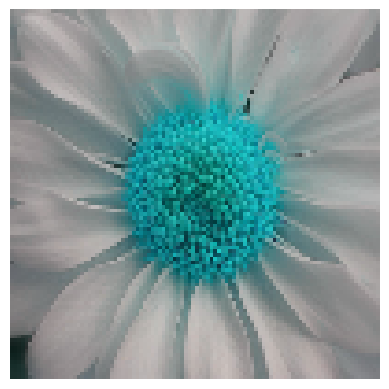

In [68]:
plt.axis('off')
plt.imshow(x[0])

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation[x][0].numpy().astype('uint8'))